In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load data
x_train = np.load("/content/drive/MyDrive/Pattern_Recognition/hw4/x_train.npy")
y_train = np.load("/content/drive/MyDrive/Pattern_Recognition/hw4/y_train.npy")
x_test = np.load("/content/drive/MyDrive/Pattern_Recognition/hw4/x_test.npy")
y_test = np.load("/content/drive/MyDrive/Pattern_Recognition/hw4/y_test.npy")

In [ ]:
# 7000 data with 300 features
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(7000, 300)
(7000,)
(3000, 300)


In [ ]:
# It's a binary classification problem 
print(np.unique(y_train))

[0 1]


# Q1

In [ ]:
def cross_validation(x_train, y_train, k=5):
    
  # Do not modify the function name and always take 'x_train, y_train, k' as the inputs.
  # TODO HERE

  # shuffle dataset's index
  idx = np.random.permutation(len(x_train))
  fold_size = len(x_train) // k
  kfold_index= []
  for i in range(k):
    val_idx = idx[i*fold_size: (i+1)*fold_size]
    train_idx = np.concatenate((idx[:i*fold_size], idx[(i+1)*fold_size:]))
    kfold_index.append([train_idx, val_idx])

  return kfold_index

In [ ]:
kfold_data = cross_validation(x_train, y_train, k=10)
assert len(kfold_data) == 10 # should contain 10 fold of data
assert len(kfold_data[0]) == 2 # each element should contain train fold and validation fold
assert kfold_data[0][1].shape[0] == 700 # The number of data in each validation fold should equal to training data divieded by K

# K fold

In [6]:
from sklearn.model_selection import KFold

X = np.arange(20)

kf = KFold(n_splits=5, shuffle=True)
kfold_data= []
for i, (train_index, val_index) in enumerate(kf.split(X)):
  print("Split: %s, Training index: %s, Validation index: %s" % (i+1, train_index, val_index))
  kfold_data.append([train_index, val_index])

Split: 1, Training index: [ 1  2  3  4  5  6  7  8  9 10 11 13 15 16 18 19], Validation index: [ 0 12 14 17]
Split: 2, Training index: [ 0  1  2  3  4  6  9 10 11 12 13 14 16 17 18 19], Validation index: [ 5  7  8 15]
Split: 3, Training index: [ 0  3  4  5  6  7  8 11 12 13 14 15 16 17 18 19], Validation index: [ 1  2  9 10]
Split: 4, Training index: [ 0  1  2  3  5  7  8  9 10 12 14 15 16 17 18 19], Validation index: [ 4  6 11 13]
Split: 5, Training index: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 17], Validation index: [ 3 16 18 19]


In [ ]:
assert len(kfold_data) == 5 # should contain 5 fold of data
assert len(kfold_data[0]) == 2 # each element should contains index of training fold and validation fold
assert kfold_data[0][1].shape[0] == 4 # The number of data in each validation fold should equal to training data divieded by K

# Q2

In [ ]:
# (Example) Using SVC from sklearn
clf = SVC(C=1.0, gamma=0.01, kernel='rbf')

In [ ]:
best_c, best_gamma = None, None

# TODO HERE
# k-Flod Cross Validation and Grid Search
kfold_data = cross_validation(x_train, y_train, k=5)
C_param = [1000,100,10,1,0.1,0.01,0.001,0.0001]
gamma_param = [1000,100,10,1,0.1,0.01,0.001,0.0001]
best_score = 0
result_list = []
for c in C_param:
  for gamma in gamma_param:
    scores = []
    for i in range(len(kfold_data)):
      clf = SVC(C=c, gamma=gamma, kernel='rbf')
      train_index, val_index = kfold_data[i][0], kfold_data[i][1]
      x_train_split, x_val_split = x_train[train_index], x_train[val_index]
      y_train_split, y_val_split = y_train[train_index], y_train[val_index]
      clf.fit(x_train_split, y_train_split)
      y_pred = clf.predict(x_val_split)
      score = accuracy_score(y_pred, y_val_split)
      scores.append(score)

    mean_score = np.mean(scores)
    result = {}
    result['c'] = c
    result['gamma'] = gamma
    result['mean_score'] = mean_score
    result_list.append(result)
    print('c:{}, gamma:{}, mean_score:{}'.format(c, gamma, mean_score))

    if mean_score > best_score:
      best_score = mean_score
      best_c = c
      best_gamma = gamma

best_parameters=(best_c, best_gamma)

c:1000, gamma:1000, mean_score:0.4878571428571428
c:1000, gamma:100, mean_score:0.4878571428571428
c:1000, gamma:10, mean_score:0.4878571428571428
c:1000, gamma:1, mean_score:0.4878571428571428
c:1000, gamma:0.1, mean_score:0.4878571428571428
c:1000, gamma:0.01, mean_score:0.4878571428571428
c:1000, gamma:0.001, mean_score:0.4878571428571428
c:1000, gamma:0.0001, mean_score:0.9948571428571429
c:100, gamma:1000, mean_score:0.4878571428571428
c:100, gamma:100, mean_score:0.4878571428571428
c:100, gamma:10, mean_score:0.4878571428571428
c:100, gamma:1, mean_score:0.4878571428571428
c:100, gamma:0.1, mean_score:0.4878571428571428
c:100, gamma:0.01, mean_score:0.4878571428571428
c:100, gamma:0.001, mean_score:0.4878571428571428
c:100, gamma:0.0001, mean_score:0.9948571428571429
c:10, gamma:1000, mean_score:0.4878571428571428
c:10, gamma:100, mean_score:0.4878571428571428
c:10, gamma:10, mean_score:0.4878571428571428
c:10, gamma:1, mean_score:0.4878571428571428
c:10, gamma:0.1, mean_score:0.

In [ ]:
print("(best_c, best_gamma) is ", best_parameters)
print("best_score: ", best_score)

(best_c, best_gamma) is  (1, 0.0001)
best_score:  0.9949999999999999


# Q3

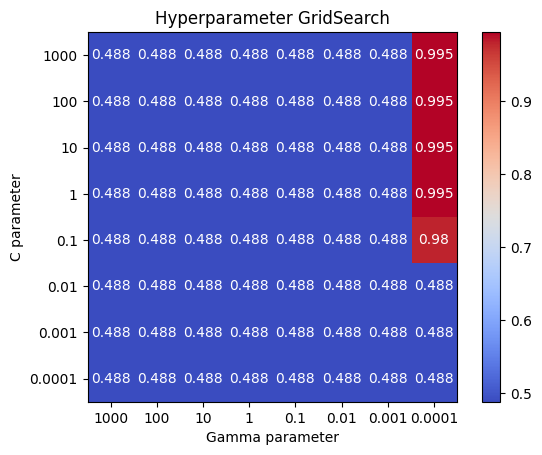

In [ ]:
# Plot the grid search results of your SVM

# TODO HERE
mean_scores = []
for i in range(len(result_list)):
  score = round(result_list[i]['mean_score'], 3)
  mean_scores.append(score)

mean_scores = np.array(mean_scores).reshape(len(C_param), len(C_param))

plt.imshow(mean_scores, cmap='coolwarm')
for i in range(len(C_param)):
  for j in range(len(gamma_param)):
    plt.text(j, i, mean_scores[i][j], ha='center', va='center', color='white')

plt.xticks(np.arange(len(gamma_param)), gamma_param)
plt.yticks(np.arange(len(C_param)), C_param)
plt.xlabel('Gamma parameter')
plt.ylabel('C parameter')
plt.colorbar()
plt.title('Hyperparameter GridSearch')
plt.show()

# Q4

In [ ]:
# Do Not Modify Below

best_model = SVC(C=best_parameters[0], gamma=best_parameters[1], kernel='rbf')
best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)

print("Accuracy score: ", accuracy_score(y_pred, y_test))

# If your accuracy here > 0.9 then you will get full credit (20 points).

Accuracy score:  0.995
